In [1]:
import json
import os
import sys
import numpy as np
from umap import UMAP
from datetime import datetime
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from metrics import get_geometric_metrics, plot_convex_hull



h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [2]:
data = json.load(open('../resultados/result.json', 'r'))
embeddings = np.array(data['embeddings_original'])
embeddings = embeddings.reshape(-1, embeddings.shape[-1])
embeddings.shape

(293, 4096)

In [3]:

embeddings2 = np.array([embeddings, embeddings])
print(293 + 293)
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[-1])
# embeddings.reshape(-1, embeddings.shape[-1]).shape
print(embeddings2.shape)
print(embeddings2[0])
print(embeddings2[293])

586
(586, 4096)
[ 0.2878418  -0.07458496  0.01417542 ...  0.01701355  0.00072098
  0.03753662]
[ 0.2878418  -0.07458496  0.01417542 ...  0.01701355  0.00072098
  0.03753662]


In [4]:
dimensionality_reduction_model = UMAP(n_components=9,  verbose=True)
embeddings = embeddings2
dimensionality_reduction_model.fit(embeddings)
reduced_embeddings = dimensionality_reduction_model.transform(embeddings)

get_geometric_metrics(reduced_embeddings)


h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
h:\conda_envs\geo_llm\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

UMAP(n_components=9, verbose=True)
Mon Jan  8 19:51:07 2024 Construct fuzzy simplicial set
Mon Jan  8 19:51:08 2024 Finding Nearest Neighbors
Mon Jan  8 19:51:10 2024 Finished Nearest Neighbor Search
Mon Jan  8 19:51:13 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jan  8 19:51:16 2024 Finished embedding
Getting Metrics:
	 Centroid...OK
	 Centroid...OK
	 ConvexHull...OK


{'mean_distance': 4.7372558652000585,
 'volume': 451.98688313527526,
 'area': 5467.42125724874}

In [8]:
dimensionality_reduction_model = UMAP(n_components=2,  verbose=True)
embeddings = embeddings2
dimensionality_reduction_model.fit(embeddings)
reduced_embeddings = dimensionality_reduction_model.transform(embeddings)

UMAP( verbose=True)
Mon Jan  8 20:04:52 2024 Construct fuzzy simplicial set
Mon Jan  8 20:04:53 2024 Finding Nearest Neighbors
Mon Jan  8 20:04:53 2024 Finished Nearest Neighbor Search
Mon Jan  8 20:04:53 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jan  8 20:04:55 2024 Finished embedding


UMAP( verbose=True)
Mon Jan  8 20:04:23 2024 Construct fuzzy simplicial set
Mon Jan  8 20:04:23 2024 Finding Nearest Neighbors
Mon Jan  8 20:04:23 2024 Finished Nearest Neighbor Search
Mon Jan  8 20:04:23 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jan  8 20:04:26 2024 Finished embedding
Creating Convex Hull...


Text(30.972222222222214, 0.5, 'UMAP Dimension 2')

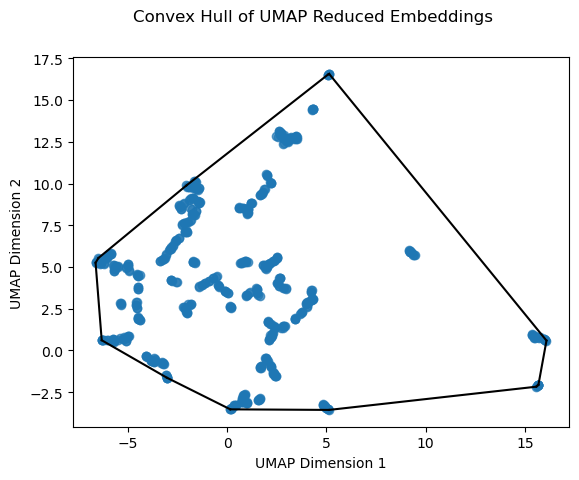

In [7]:
fig , ax = plot_convex_hull(
    reduced_embeddings, 
    path=f"../resultados/hull_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")

fig.suptitle('Convex Hull of UMAP Reduced Embeddings')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')

In [ ]:
import matplotlib.pyplot as plt

emb1 = reduced_embeddings[:80, :]
emb2 = reduced_embeddings[:80, :]

fig , ax = plt.subplots()
 
 plot_convex_hull(
    reduced_embeddings, 
    savefig=False)

fig.suptitle('Convex Hull of UMAP Reduced Embeddings')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')